In [1]:
from data import *
from models import *
from utils import *
import torch
import random

In [2]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
model_type = 'classic' # quantum or classic
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_path = "../../data/EstData.csv"
file_path = "pkpd.pkl"
model_save_path = f"./model_save_{model_type}.pt"
# model_save_path = None

# train experiments

In [3]:
prepare_dataframe(data_path, file_path)
data_loader_1d_3m = eICUDataLoader(batch_size=512, file_path=file_path, 
                             t_headings=['t'],
                             x_headings=['x'],
                             cond_headings=['c_dose', 'c_bw', 'c_comed', 'c_init'],
                             memory=3)

train_loader_1d_3m = data_loader_1d_3m.get_train_loader(shuffle=True)
val_loader_1d_3m = data_loader_1d_3m.get_val_loader()

True
True
True
True
True


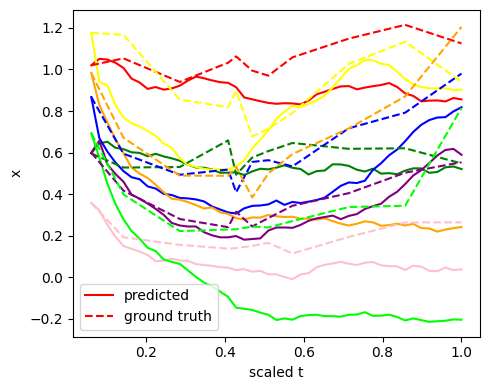

validation loss: 0.07084787636995316

CPU times: user 1.5 s, sys: 156 ms, total: 1.65 s
Wall time: 1.69 s


In [4]:
%%time
# Create the model instance
model = MLP_Cond_Memory_Module(treatment_cond=4, memory=3, 
                                     dim=1, w=32,
                                     time_varying=False, 
                                     conditional=True,
                                     lr=5e-3, 
                                     sigma=2.,
                                     loss_fn=mse_loss, 
                                     metrics=['mse_loss'], 
                                     implementation="SDE", 
                                     sde_noise=0.01, 
                                     clip=0.01,
                                     model_type = model_type
                              ).to(device)
# Load the model
try:
    model.load_state_dict(torch.load(model_save_path, weights_only=True))
    test_model(model, False, val_loader_1d_3m, device)
# Train the model
except:
    train_model(model, False, train_loader_1d_3m, val_loader_1d_3m, num_epochs=1500, device=device, 
            eval_every=500, model_save_path = model_save_path)
    if model_save_path is not None:
        torch.save(model.state_dict(), model_save_path)
#         model.load_state_dict(torch.load(model_save_path, weights_only=True))
model.eval()  # Set the model to evaluation mode
print()

In [6]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [7]:
pytorch_total_params

3522